In [1]:
from selenium.webdriver.common.keys import Keys
import csv
import datetime
import time
import os
from selenium import webdriver

import matplotlib.pyplot as plt
import collections
from openpyxl import load_workbook

import math
import statistics
import numpy as np


In [3]:
froggy_news = []
with open(filename, encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if row == ['Title', 'Link', 'Date', 'Summary']: continue

        Title = "".join(row[0].split())
        Link = row[1]
        Date = row[2].split(" ")[0].replace("-", "/")
        Summary = "".join(row[3].split())

        froggy_news.append({"title": Title, "link": Link, "date": Date, "summary":Summary})

froggy_news[0]



{'title': '20場公投意見發表會時程曝連勝文談萊豬、呱吉VS黃士修辯核四',
 'link': 'https://www.ettoday.net/news/20211105/2117049.htm?from=pctaglist',
 'date': '2021/11/05',
 'summary': '4大公投12月18日登場，為此中選會自11月13日起至12月11日間各辦理5場意見發表會，總計20場，分別由華視、民視、中視、台視、公視等5家無線電視台進行轉播，並同步於中選會網站直播。'}

In [5]:
# opview 資料（聲量）
wb = load_workbook(filename='單主題_趨勢_20201101_20211110.xlsx')
op_view_data = collections.OrderedDict()
opview_wb = wb['日趨勢']
for i in range(2, opview_wb.max_row+1):
    day = opview_wb.cell(column=1, row=i).value
    qty = opview_wb.cell(column=2, row=i).value

    
    op_view_data[day] = qty
    
# opview 資料（情緒）
wb = load_workbook(filename="單主題_情緒_20201101_20211110.xlsx")
op_view_emotion = collections.OrderedDict(
    {'good': collections.OrderedDict(), 'bad': collections.OrderedDict()})
opview_wb = wb['日情緒趨勢']
for i in range(2, opview_wb.max_row+1):

    day = opview_wb.cell(column=1, row=i).value
    good = opview_wb.cell(column=2, row=i).value
    bad = opview_wb.cell(column=3, row=i).value
    total = opview_wb.cell(column=4, row=i).value

    
    op_view_emotion["good"][day] = good
    op_view_emotion["bad"][day] = bad


/Users/bobo/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
# opview daily difference 
data = list(op_view_data.values())
op_view_diff = collections.OrderedDict()
for idx, day in enumerate(op_view_data):
    if idx == 0:
        op_view_diff[day] = 0
        continue
    val = abs((data[idx] - data[idx-1]))
    if val == 0: val = 0.01
    diff = math.log(val)
    op_view_diff[day] = diff


In [11]:
# large difference
large_diff = []
large_diff_bool_list = []
mean = np.mean(list(op_view_diff.values()))
stdev = np.std(list(op_view_diff.values()))
for day, value in op_view_diff.items():
    if abs(value) > mean + stdev:
        large_diff.append(day)
        large_diff_bool_list.append(5)
    else:
        large_diff_bool_list.append(np.nan)


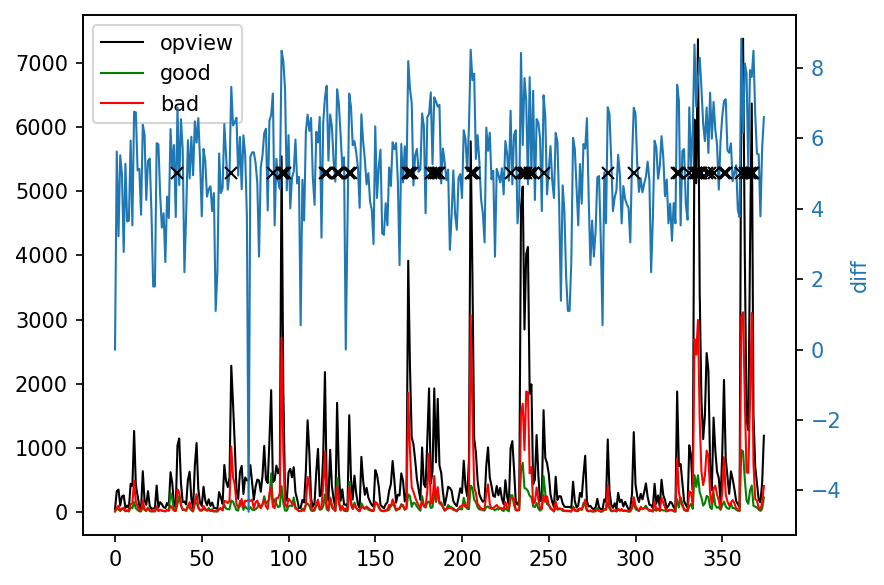

In [12]:
fig, ax1 = plt.subplots(dpi=150)
# ax1.plot(daily_view_data.values(), figure=fig, linewidth=1, c='orange', label="dailyview")
ax1.plot(op_view_data.values(), figure=fig, linewidth=1, c='black', label="opview")
ax1.plot(op_view_emotion["good"].values(), figure=fig, linewidth=1, c='g', label="good")
ax1.plot(op_view_emotion["bad"].values(), figure=fig, linewidth=1, c='r', label="bad")


ax1.legend()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('diff', color=color)  # we already handled the x-label with ax1
ax2.plot(op_view_diff.values(), linewidth=1, label="diff")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(large_diff_bool_list, marker="x", color='black')
# ax2.set_ylim([0, 200])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [60]:
froggy_hot_title = []
froggy_hot_news = []
for news in froggy_news:
    if news['date'] in large_diff:
        print(news['title'])
        froggy_hot_title.append(news['title'])
        froggy_hot_news.append(news['summary'])

柯文哲「無視」監視器畫面曝光網看完嗆爆呱吉：雙標打臉自己
柯文哲突襲議員辦公室呱吉動怒捶桌：企圖製造「不願見面假象」
快訊／呱吉不再參選！她繼承衣缽投入民進黨2022港湖區議員初選
喜劇圈回收龍龍！東區德聲援…呱吉心疼：就算是Bitch，也是我們的
才開嗆呱吉！龍龍遭爆「炎上找4寫手」：沒聲稱我的本是自己寫的
呱吉道歉龍龍了！「挖出1年前PO文」點名老K霸凌：應該道歉
龍龍暴怒開戰呱吉：噁不噁心！「400字火力滿點」親揭被誣衊真相
驚爆「龍龍爆氣退群組」內幕！呱吉酒後直播：我不知怎跟她相處
陳柏惟台語問政掀論戰呱吉「一句話力挺」！網怒嗆：這叫硬拗
呱吉稱不需太在意被譏「塔綠班」：民進黨以前就是這樣贏國民黨的
陳時中成為「虛擬貨幣大師」網瘋傳！內行揭手法：之前是郭董
林珍羽161秒內講了7次「珍羽」呱吉譏「原始人」：發言超沒邏輯
呱吉看好心肝調查報告！釣出高嘉瑜「崩潰臉」自損：有看到我嗎
呱吉評論林瑋豐「看不出跟民進黨的關係」起碼是個立場一致的人
一日北高關注度輸呱吉柯文哲：很正常啊！畢竟騎過了
才挺雞排妹！呱吉被挖出脫口秀喊「把高雄人X到脫肛」網怒轟雙標
「現場所有叫囂都是表演而已」呱吉曝未參與零檢出釋憲案表決理由


In [15]:
import jieba

In [57]:
hot_news_word_list = []
for sentence in froggy_hot_news:
    seg_list = jieba.cut(sentence)
    # print('/'.join(seg_list))
    words = " ".join(seg_list).split(" ")

    hot_news_word_list = hot_news_word_list + words


In [59]:
hot_news_word_list.remove('議員')

hot_news_word_list.remove('台北市')
hot_news_word_list.remove('長')
hot_news_word_list.remove('呱吉')
hot_news_word_list.remove('北市')
' '.join(hot_news_word_list)



'柯文 哲為 拚 熊好券 預算 過關 ， 上周 赴 議員辦 公室 爭取 支持 ， 但 卻 指控 都 躲 起來 了 ， 此話 一出 另 「 」 、 邱威傑 勃然大怒 ， 反 嗆 是 柯文 哲視 而 不見 ， 揚言要 調出 監視器 畫面 還原 。 不過 ， 網友 看到 畫面 後 猛酸呱吉 ， 明明 是 電梯 出口 的 「 擦肩 而過 」 ， 「 這 到底 是 有 甚麼 好 吵 的 」 。 台北市 政府 推出 的 「 熊好券 」 因違 背 預算 審查 程序 ， 5 億 預算 墊 付案 被 台北市 議會 暫擱 ， 台北市 柯文 哲 27 日 中午 拜會 台北市 議會 新黨 黨團 ， 臨時 決定 結束 後 要 拜訪 其他 台北市 議員 ， 但 該筆 預算 最終 仍 因 朝野 議員 無共識 暫割 。 台北市 議員 「 」 邱威傑 28 日 於 議會動 怒 拍桌 ， 直批 市府 沒有 事先 知會 ， 而 柯文 哲 也 當場 道歉 「 我們 錯 了 。 」 各政黨 逐步 布局 2022 大選 。 過去 曾 以 社民黨籍 參選 2018 台北市 第五 選區 （ 中正 、 萬華 ） 的 無黨籍 台北市 議員 邱威傑 （ 呱吉 ） 辦公 室主任 許菡 芸 ， 傳出 投入 民進 黨港 湖區 議員 的 初選 。 對此 ， 邱威傑 12 日 在 臉書 證實 此事 ， 並 表示 自己 一直 說 不會 繼續 參選 ， 但 一走了之 好像 沒給 選民 交代 ， 有 一個 辦公 室主任 願意 繼承衣 缽 ， 等 於 扛下 他 的 這棒責任 ， 讓 他 如釋 重負 ， 許菡 芸 一定 可以 做 得 比 他 更好 。 龍龍 （ 林千聿 ） 日前 控訴 遭薩泰爾 娛樂 班底 老 K 霸凌 ， 沒 想到 ， 鄭家純 （ 雞 排妹 ） 7 日開 直播 爆氣 表示 對方後來 聲稱 「 記錯 了 」 ， 老 K 當初 在 炎上 現場 根本 沒 提到 「 前男友 」 3 個 字 ， 氣得 公司 馬 上 跟 她 解約 ， 而 這一場 將近 6 萬人 收看 的 直播 ， 也 讓 不少 喜劇 圈 人 發聲 ， 語氣 中 透露 「 心疼 龍龍 」 的 氛圍 ， 引起 熱議 。 脫口秀 演員 「 龍龍 」 控訴 被 薩泰爾 班底 「 老 K 」 出言 霸凌 ， 之 後 又 被 呱吉 （ 邱威傑 ） 開 直播 暗指 不好 相處 

In [65]:

for i in hot_news_word_list:
    if i in ['北市', '台北市', '議員', '呱吉', '邱威傑']:
        continue
    print(i, end=" ")



柯文 哲為 拚 熊好券 預算 過關 ， 上周 赴 議員辦 公室 爭取 支持 ， 但 卻 指控 都 躲 起來 了 ， 此話 一出 另 「 」 、 勃然大怒 ， 反 嗆 是 柯文 哲視 而 不見 ， 揚言要 調出 監視器 畫面 還原 。 不過 ， 網友 看到 畫面 後 猛酸呱吉 ， 明明 是 電梯 出口 的 「 擦肩 而過 」 ， 「 這 到底 是 有 甚麼 好 吵 的 」 。 政府 推出 的 「 熊好券 」 因違 背 預算 審查 程序 ， 5 億 預算 墊 付案 被 議會 暫擱 ， 柯文 哲 27 日 中午 拜會 議會 新黨 黨團 ， 臨時 決定 結束 後 要 拜訪 其他 ， 但 該筆 預算 最終 仍 因 朝野 無共識 暫割 。 「 」 28 日 於 議會動 怒 拍桌 ， 直批 市府 沒有 事先 知會 ， 而 柯文 哲 也 當場 道歉 「 我們 錯 了 。 」 各政黨 逐步 布局 2022 大選 。 過去 曾 以 社民黨籍 參選 2018 第五 選區 （ 中正 、 萬華 ） 的 無黨籍 （ ） 辦公 室主任 許菡 芸 ， 傳出 投入 民進 黨港 湖區 的 初選 。 對此 ， 12 日 在 臉書 證實 此事 ， 並 表示 自己 一直 說 不會 繼續 參選 ， 但 一走了之 好像 沒給 選民 交代 ， 有 一個 辦公 室主任 願意 繼承衣 缽 ， 等 於 扛下 他 的 這棒責任 ， 讓 他 如釋 重負 ， 許菡 芸 一定 可以 做 得 比 他 更好 。 龍龍 （ 林千聿 ） 日前 控訴 遭薩泰爾 娛樂 班底 老 K 霸凌 ， 沒 想到 ， 鄭家純 （ 雞 排妹 ） 7 日開 直播 爆氣 表示 對方後來 聲稱 「 記錯 了 」 ， 老 K 當初 在 炎上 現場 根本 沒 提到 「 前男友 」 3 個 字 ， 氣得 公司 馬 上 跟 她 解約 ， 而 這一場 將近 6 萬人 收看 的 直播 ， 也 讓 不少 喜劇 圈 人 發聲 ， 語氣 中 透露 「 心疼 龍龍 」 的 氛圍 ， 引起 熱議 。 脫口秀 演員 「 龍龍 」 控訴 被 薩泰爾 班底 「 老 K 」 出言 霸凌 ， 之 後 又 被 （ ） 開 直播 暗指 不好 相處 ， 風波 延燒 至今 戰火 依然 猛烈 。 而 她 之前 表示 從 正式 登台 至今 ， 單口 喜劇 的 稿子 都 是 自己 寫 的 ， 3 日 卻

In [264]:
i
out_filename = "froggy_hot_news.txt"
with open(out_filename, 'a') as out_file:
    
    out_file.write(" ".join(hot_news_word_list))
   

